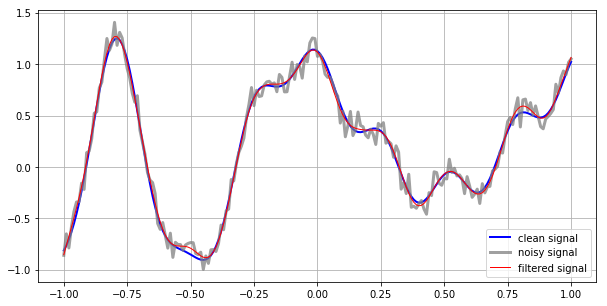

In [1]:
#code copied from http://scipy-cookbook.readthedocs.io/items/FiltFilt.html (slightly modified by NAF)

%matplotlib inline 

from numpy import sin, cos, pi, linspace
from numpy.random import randn
from scipy.signal import lfilter, lfilter_zi, filtfilt, butter, savgol_filter

import matplotlib.pyplot as plt


# Generate a noisy signal to be filtered.
t = linspace(-1, 1, 201)
x = (sin(2 * pi * 0.75 * t*(1-t) + 2.1) + 0.1*sin(2 * pi * 1.25 * t + 1) +
    0.18*cos(2 * pi * 3.85 * t))
xn = x + randn(len(t)) * 0.08

# Create an order 3 lowpass butterworth filter.

filter_order = 3          #filter is third order
Nyquist_frequency = 0.13  # should be between 0 and 1. Original example was for 0.05

b, a = butter(filter_order, Nyquist_frequency)

# Apply the filter to xn.  Use lfilter_zi to choose the initial condition
# of the filter.
zi = lfilter_zi(b, a)
z, _ = lfilter(b, a, xn, zi=zi*xn[0])

# Apply the filter again, to have a result filtered at an order
# the same as filtfilt (twice that of the original Butterworth filter)
z2, _ = lfilter(b, a, z, zi=zi*z[0])

# Use filtfilt to apply the filter.
y = filtfilt(b, a, xn)

# Make the plot.
plt.figure(figsize=(10,5))
plt.plot(t, x, 'blue', linewidth=2, label = 'clean signal')
plt.plot(t, xn, 'grey', linewidth=3, alpha=0.75, label = 'noisy signal')
#plt.plot(t, z, 'r--', linewidth=1.75, label = 'lfilter, once')
#plt.plot(t, z2, 'r', linewidth=1.75, label = 'lfilter,twice' )
plt.plot(t, y, 'red', linewidth=1, label = 'filtered signal')
plt.legend(loc='best')
plt.grid(True)
plt.show()
#savefig('plot.png', dpi=65)